In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#Store the data into Data Frame
df = pd.read_csv('/content/drive/My Drive/NSE 2018 data.csv')

In [0]:
IOB = df[df.SYMBOL.isin(['IOB'])]

In [5]:
print(IOB.head())
print(IOB.shape)

       SYMBOL       sector   OPEN  ...     TOTTRDVAL      TIMESTAMP  TOTALTRADES
134744    IOB  Banks - PSU  22.20  ...  2.178484e+07  1/1/2018 0:00         2046
134745    IOB  Banks - PSU  22.35  ...  1.608124e+07  1/2/2018 0:00         1954
134746    IOB  Banks - PSU  22.40  ...  2.253496e+07  1/3/2018 0:00         1322
134747    IOB  Banks - PSU  22.70  ...  6.572533e+07  1/4/2018 0:00         4526
134748    IOB  Banks - PSU  24.50  ...  1.436609e+08  1/5/2018 0:00         9965

[5 rows x 10 columns]
(215, 10)


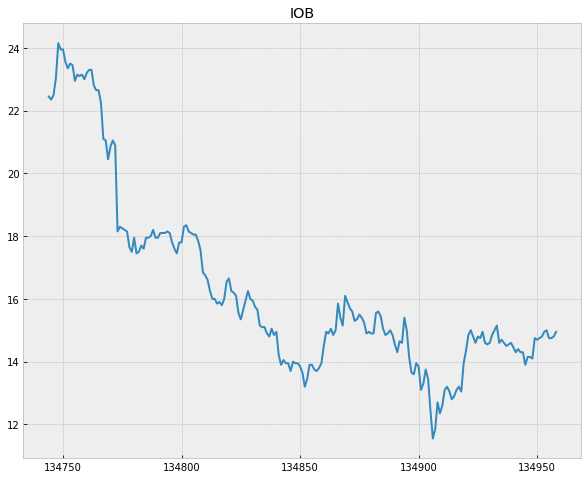

In [6]:
# Vizualize the close price data
plt.figure(figsize=(10,8))
plt.title('IOB')
plt.plot(IOB['CLOSE'])
plt.show()

In [7]:
IOB = IOB[['CLOSE']]
IOB.head()

,CLOSE
134744,22.45
134745,22.35
134746,22.50
134747,23.05
134748,24.15


In [8]:
# Create a variable to predict 'x' days out into the future
future_days = 36
# Create a column (target) shifted 'x' days up
IOB['Prediction'] = IOB[['CLOSE']].shift(-future_days)
IOB.tail()

,CLOSE,Prediction
134954,15.00,NaN
134955,14.75,NaN
134956,14.75,NaN
134957,14.80,NaN
134958,14.95,NaN


In [9]:
# Create the future dataset (x) and convert it to a numpy array and remove the last 'x' rows/days
x = np.array(IOB.drop(['Prediction'],1))[:-future_days]
print(x)

[[22.45]
 [22.35]
 [22.5 ]
 [23.05]
 [24.15]
 [23.95]
 [23.95]
 [23.55]
 [23.35]
 [23.5 ]
 [23.45]
 [22.95]
 [23.15]
 [23.1 ]
 [23.15]
 [23.  ]
 [23.2 ]
 [23.3 ]
 [23.3 ]
 [22.8 ]
 [22.65]
 [22.65]
 [22.25]
 [21.1 ]
 [21.05]
 [20.45]
 [20.85]
 [21.05]
 [20.9 ]
 [18.15]
 [18.3 ]
 [18.25]
 [18.2 ]
 [18.15]
 [17.65]
 [17.5 ]
 [17.95]
 [17.45]
 [17.5 ]
 [17.7 ]
 [17.6 ]
 [17.95]
 [17.95]
 [18.  ]
 [18.2 ]
 [17.95]
 [17.95]
 [18.1 ]
 [18.1 ]
 [18.1 ]
 [18.15]
 [18.1 ]
 [17.8 ]
 [17.6 ]
 [17.45]
 [17.8 ]
 [17.8 ]
 [18.3 ]
 [18.35]
 [18.15]
 [18.1 ]
 [18.05]
 [18.05]
 [17.85]
 [17.55]
 [16.85]
 [16.75]
 [16.6 ]
 [16.25]
 [16.  ]
 [16.  ]
 [15.85]
 [15.9 ]
 [15.8 ]
 [16.  ]
 [16.55]
 [16.65]
 [16.25]
 [16.2 ]
 [16.1 ]
 [15.55]
 [15.35]
 [15.65]
 [15.95]
 [16.25]
 [16.  ]
 [15.95]
 [15.75]
 [15.65]
 [15.15]
 [15.1 ]
 [15.1 ]
 [14.9 ]
 [14.8 ]
 [15.05]
 [14.85]
 [14.95]
 [14.2 ]
 [13.9 ]
 [14.05]
 [13.95]
 [13.95]
 [13.7 ]
 [14.  ]
 [13.95]
 [13.95]
 [13.85]
 [13.65]
 [13.2 ]
 [13.45]
 [13.9 ]
 

In [10]:
# Create the target dataset (y) and convert it to numpy array and get all the target values except the last 'x' rows/days
y = np.array(IOB['Prediction'])[:-future_days]
print(y)

[17.95 17.45 17.5  17.7  17.6  17.95 17.95 18.   18.2  17.95 17.95 18.1
 18.1  18.1  18.15 18.1  17.8  17.6  17.45 17.8  17.8  18.3  18.35 18.15
 18.1  18.05 18.05 17.85 17.55 16.85 16.75 16.6  16.25 16.   16.   15.85
 15.9  15.8  16.   16.55 16.65 16.25 16.2  16.1  15.55 15.35 15.65 15.95
 16.25 16.   15.95 15.75 15.65 15.15 15.1  15.1  14.9  14.8  15.05 14.85
 14.95 14.2  13.9  14.05 13.95 13.95 13.7  14.   13.95 13.95 13.85 13.65
 13.2  13.45 13.9  13.9  13.75 13.7  13.8  13.95 14.5  14.95 14.9  15.05
 14.85 15.   15.85 15.4  15.15 16.1  15.9  15.7  15.6  15.3  15.35 15.5
 15.4  15.25 14.9  14.95 14.9  14.9  15.55 15.6  15.45 15.05 14.85 14.9
 15.   14.85 14.55 14.3  14.65 14.6  15.4  15.   14.15 13.65 13.6  13.95
 13.85 13.1  13.3  13.75 13.45 12.45 11.55 11.85 12.7  12.35 12.6  13.1
 13.2  13.05 12.8  12.9  13.1  13.2  13.05 13.95 14.35 14.85 15.   14.8
 14.6  14.8  14.75 14.95 14.6  14.55 14.6  14.85 15.   15.15 14.6  14.7
 14.6  14.5  14.55 14.6  14.45 14.3  14.4  14.3  14.3  13

In [0]:
# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [0]:
# Create the models
# Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train,y_train)

In [13]:
# Get the last 'x' rows of future dataset
x_future = IOB.drop(['Prediction'],1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[14.9 ],
       [15.  ],
       [14.85],
       [14.55],
       [14.3 ],
       [14.65],
       [14.6 ],
       [15.4 ],
       [15.  ],
       [14.15],
       [13.65],
       [13.6 ],
       [13.95],
       [13.85],
       [13.1 ],
       [13.3 ],
       [13.75],
       [13.45],
       [12.45],
       [11.55],
       [11.85],
       [12.7 ],
       [12.35],
       [12.6 ],
       [13.1 ],
       [13.2 ],
       [13.05],
       [12.8 ],
       [12.9 ],
       [13.1 ],
       [13.2 ],
       [13.05],
       [13.95],
       [14.35],
       [14.85],
       [15.  ]])

In [14]:
# Show the model of tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()

[13.85       14.3        14.675      14.55       14.75       14.55
 14.55       13.85       14.3        15.25       15.025      15.025
 14.95       14.725      14.48333333 14.55       14.625      14.45
 14.3        14.4        14.4        14.3        13.9        14.3
 14.48333333 14.525      14.75       14.7        14.7        14.48333333
 14.525      14.75       14.95       14.75       14.675      14.3       ]



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


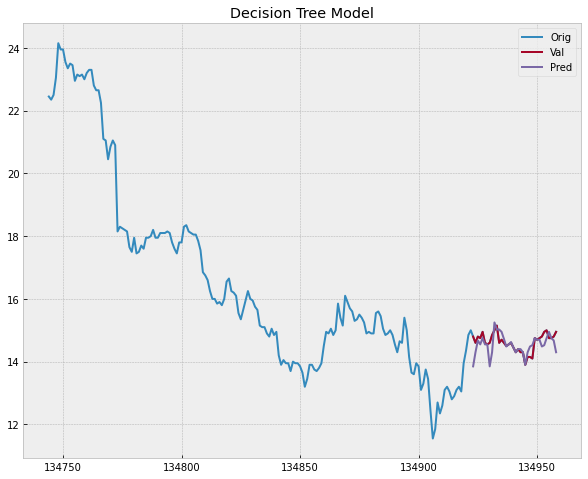

In [15]:
# Vizualixe the data 
prediction = tree_prediction
valid = IOB[x.shape[0]:]
valid ['Prediction'] = prediction
plt.figure(figsize=(10,8))
plt.title('Decision Tree Model')
plt.plot(IOB['CLOSE'])
plt.plot(valid[['CLOSE', 'Prediction']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

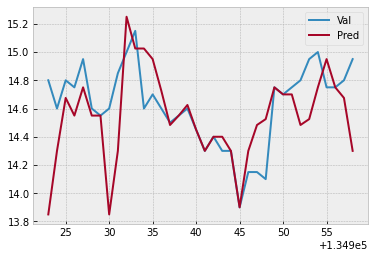

In [16]:
plt.plot(valid[['CLOSE', 'Prediction']])
plt.legend(['Val', 'Pred'])
plt.show()

In [17]:
valid.head()

,CLOSE,Prediction
134923,14.80,13.850
134924,14.60,14.300
134925,14.80,14.675
134926,14.75,14.550
134927,14.95,14.750


In [0]:
# Create the lenear regresion model
lr = LinearRegression().fit(x_train,y_train)

In [19]:
# Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)
print()

[14.5057602  14.54407568 14.48660246 14.37165601 14.2758673  14.40997149
 14.39081375 14.69733761 14.54407568 14.21839408 14.02681667 14.00765893
 14.14176312 14.10344763 13.81608151 13.89271248 14.06513215 13.9501857
 13.56703088 13.22219154 13.33713798 13.66281958 13.5287154  13.6245041
 13.81608151 13.854397   13.79692377 13.70113507 13.73945055 13.81608151
 13.854397   13.79692377 14.14176312 14.29502505 14.48660246 14.54407568]



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


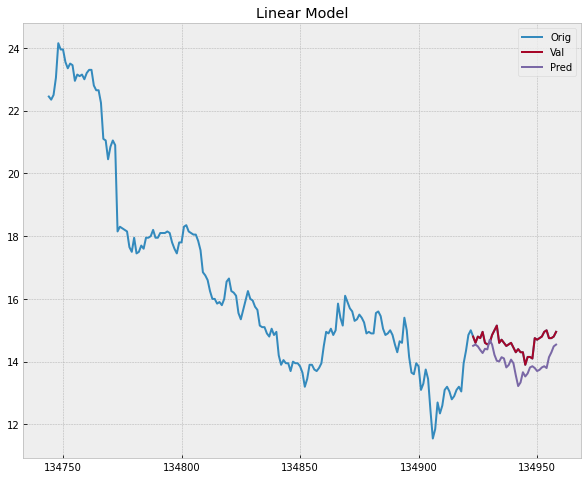

In [20]:
# Vizualixe the data 
prediction = lr_prediction
valid = IOB[x.shape[0]:]
valid ['Prediction'] = prediction
plt.figure(figsize=(10,8))
plt.title('Linear Model')
plt.plot(IOB['CLOSE'])
plt.plot(valid[['CLOSE', 'Prediction']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

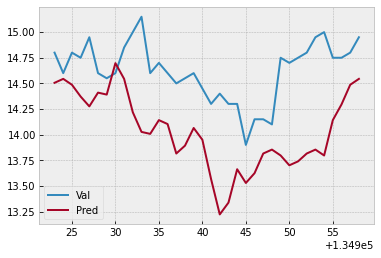

In [21]:
plt.plot(valid[['CLOSE', 'Prediction']])
plt.legend(['Val', 'Pred'])
plt.show()

In [22]:
valid.head()

,CLOSE,Prediction
134923,14.80,14.505760
134924,14.60,14.544076
134925,14.80,14.486602
134926,14.75,14.371656
134927,14.95,14.275867
